In [1]:
import pandas as pd
import seaborn as sns
from tools import *

In [2]:
df = pd.read_csv('data/crypto_1m.csv', index_col='unix')
df = df[-60*24*2:-60*24*1] # pick highest cointegrated pairs from t-24 hours

<AxesSubplot:>

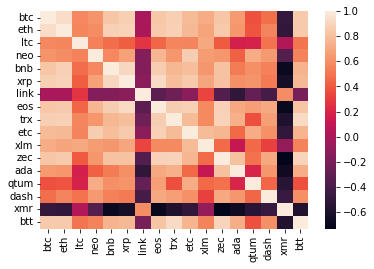

In [3]:
corr = df.corr()
sns.heatmap(corr)

In [4]:
n = corr.shape[0]
total_pairs = n**2 - n
total_pairs

272

In [5]:
def get_top_n_corr(corr, n):
    return corr.unstack().sort_values(ascending=False)[corr.shape[0]:corr.shape[0]+n*2][::2]
top_corr = get_top_n_corr(corr, 100)
top_corr

btc   eth     0.937012
btt   trx     0.924215
xrp   eos     0.922190
bnb   xrp     0.906262
btt   zec     0.897158
                ...   
xrp   ltc     0.413927
zec   ltc     0.404766
eth   qtum    0.380890
qtum  btc     0.367184
      btt     0.365466
Length: 100, dtype: float64

In [6]:
p_values = []
for i, j in list(top_corr.axes[0]):
    pair = i + ' ' + j
    b1, b0, adf_p = fit_model(df[i], df[j])
    p_values.append({'pair':pair, 'p_value':adf_p})

In [7]:
pd.DataFrame(p_values).sort_values(by='p_value')

,pair,p_value
1,btt trx,0.000198
69,link xmr,0.000622
15,neo etc,0.002400
46,xlm ltc,0.003382
4,btt zec,0.006173
...,...,...
94,neo ada,0.945824
65,xrp ada,0.972864
59,eth ada,0.979799
82,bnb ada,0.984689


In [9]:
# Note: Orders matter slightly !
b1, b0, adf_p = fit_model(df['neo'], df['etc'])
print(adf_p)

0.0024000501840154877
